In [132]:
# Embeddings from scratch - building word2vec

In [92]:
with open('text/breaking_bad_s02e08.txt', 'r') as file:
    text = file.read()

In [93]:
import re
text = text.replace("\n", " ")
text = text.replace("  ", " ")
text = re.sub(r"[^a-zA-Z0-9 ]", "", text.lower())
print(text)

scene bench cop you selling badger i dont know what youre talking about cop thats cool im just saying you know if you were selling i could maybe do with a teenth badger youre kidding right dude i so smell bacon cop what what are you talking about badger gee i dont know how about over there that brown van thats yours right cop what brown van badger parked all inconspicuous its a cop van another one right over there duke city flowers come on cant you at least be original cop dude i just want to get high badger a flower van you know what you should do is a garbage truck seriously and i dont mean to disrespect but if you put a bunch of cops in the back of a garbage truck theres no way im seriously thinking that theres cops in the back of a garbage truck its a freebie yo just think about it think about it boys cop all right im hitting it badger you dudes give up that easy cop im not a cop badger then lift your shirt show me youre not wearing a wire cop all right you know what just to show y

In [94]:
# !pip install nltk

In [95]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
text = " ".join([word for word in text.split() if word not in stop_words])
print(text)

scene bench cop selling badger dont know youre talking cop thats cool im saying know selling could maybe teenth badger youre kidding right dude smell bacon cop talking badger gee dont know brown van thats right cop brown van badger parked inconspicuous cop van another one right duke city flowers come cant least original cop dude want get high badger flower van know garbage truck seriously dont mean disrespect put bunch cops back garbage truck theres way im seriously thinking theres cops back garbage truck freebie yo think think boys cop right im hitting badger dudes give easy cop im cop badger lift shirt show youre wearing wire cop right know show youre asshle badger im blinded white cop douchebag badger come joking come dont walk away angry sit come mean complaining got abs man kinda cop whatever dude im even sure want buy anymore think turned whole thing badger come dont like need prove know prove youre cop cop hell supposed badger dont know got go punch dude right face cop dude dude

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewvassili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
text

'scene bench cop selling badger dont know youre talking cop thats cool im saying know selling could maybe teenth badger youre kidding right dude smell bacon cop talking badger gee dont know brown van thats right cop brown van badger parked inconspicuous cop van another one right duke city flowers come cant least original cop dude want get high badger flower van know garbage truck seriously dont mean disrespect put bunch cops back garbage truck theres way im seriously thinking theres cops back garbage truck freebie yo think think boys cop right im hitting badger dudes give easy cop im cop badger lift shirt show youre wearing wire cop right know show youre asshle badger im blinded white cop douchebag badger come joking come dont walk away angry sit come mean complaining got abs man kinda cop whatever dude im even sure want buy anymore think turned whole thing badger come dont like need prove know prove youre cop cop hell supposed badger dont know got go punch dude right face cop dude dud

In [97]:
import re

def tokenize(text):
    text = text.lower().replace('.', '').replace(',', '').split(' ')
    return text

In [98]:
tokens = tokenize(text)

In [99]:
def map_tokens(tokens):
    token_to_id = {}
    id_to_token = {}
    unique_tokens = sorted(set(tokens))

    for i, token in enumerate(unique_tokens):
        token_to_id[token] = i
        id_to_token[i] = token
    

    return token_to_id, id_to_token

In [100]:
token_to_id, id_to_token = map_tokens(tokens)

In [101]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [102]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [103]:
# !pip install numpy

In [124]:
import numpy as np
# TODO rewrite this function in a more intuitive way ... without iterables
def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)
        

In [125]:
X, y = generate_training_data(tokens, token_to_id, 3)

In [126]:
def initialise_model(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [127]:
model = initialise_model(len(token_to_id), 15)

In [128]:
def forward(model, X, return_cache=True):
    cache = {}
    cache["a1"] = X @ model["w1"]  # w1 is the dense representation
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

In [129]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [130]:
def backward(model, X, y, lr):
    cache = forward(model, X)
    da2 = cache["z"] - y  # predicted minus actual
    dw2 = cache["a1"].T @ da2  # 
    da1 = da2 @ model["w2"].T  # 
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= lr * dw1
    model["w2"] -= lr * dw2
    return cross_entropy(cache["z"], y)

In [131]:
def cross_entropy(z, y):
    return -np.sum(y * np.log(z))

In [132]:
# !pip install matplotlib

Loop number: 1
Loop number: 2
Loop number: 3
Loop number: 4
Loop number: 5
Loop number: 6
Loop number: 7
Loop number: 8
Loop number: 9
Loop number: 10
Loop number: 11
Loop number: 12
Loop number: 13
Loop number: 14
Loop number: 15
Loop number: 16
Loop number: 17
Loop number: 18
Loop number: 19
Loop number: 20
Loop number: 21
Loop number: 22
Loop number: 23
Loop number: 24
Loop number: 25
Loop number: 26
Loop number: 27
Loop number: 28
Loop number: 29
Loop number: 30
Loop number: 31
Loop number: 32
Loop number: 33
Loop number: 34
Loop number: 35
Loop number: 36
Loop number: 37
Loop number: 38
Loop number: 39
Loop number: 40
Loop number: 41
Loop number: 42
Loop number: 43
Loop number: 44
Loop number: 45
Loop number: 46
Loop number: 47
Loop number: 48
Loop number: 49
Loop number: 50
Loop number: 51
Loop number: 52
Loop number: 53
Loop number: 54
Loop number: 55
Loop number: 56
Loop number: 57
Loop number: 58
Loop number: 59
Loop number: 60
Loop number: 61
Loop number: 62
Loop number: 63
L

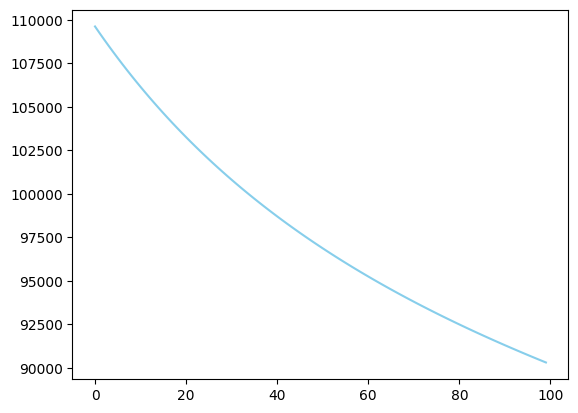

In [135]:
import matplotlib.pyplot as plt
n_iter = 100
learning_rate = 0.001

history = []
for i in range(n_iter):
    history.append(backward(model, X, y, learning_rate))
    print(f'Loop number: {i+1}')
plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [250]:
def get_embedding(model, token):
    try:
        idx = token_to_id[token]
    except:
        print(f'{token} not found in dataset')
    one_hot = one_hot_encode(idx, len(token_to_id))
    return forward(model, one_hot)

In [251]:
# some examples
embeddings_arrangement = get_embedding(model, "arrangement")["a1"]
embeddings_sound = get_embedding(model, "sound")["a1"]
embeddings_elements = get_embedding(model, "elements")["a1"]
embeddings_mechanically = get_embedding(model, "mechanically")["a1"]


In [252]:
# calculating the dot product
similarity = np.dot(embeddings_arrangement, embeddings_sound)
print(similarity)

4.64609152221737


In [253]:
# normalising the dot product to calculate the cosine similarity
cosine_similarity = np.dot(embeddings_arrangement, embeddings_sound) / (
    np.linalg.norm(embeddings_arrangement) * np.linalg.norm(embeddings_sound)
)
print(cosine_similarity)


0.2548269064113967


In [49]:
!pip install scikit-learn

In [141]:
# plotting the word clusters
all_embeddings = model["w1"]
# all_embeddings = all_embeddings[:round(len(all_embeddings)/2)]

IndexError: index 514 is out of bounds for axis 0 with size 514

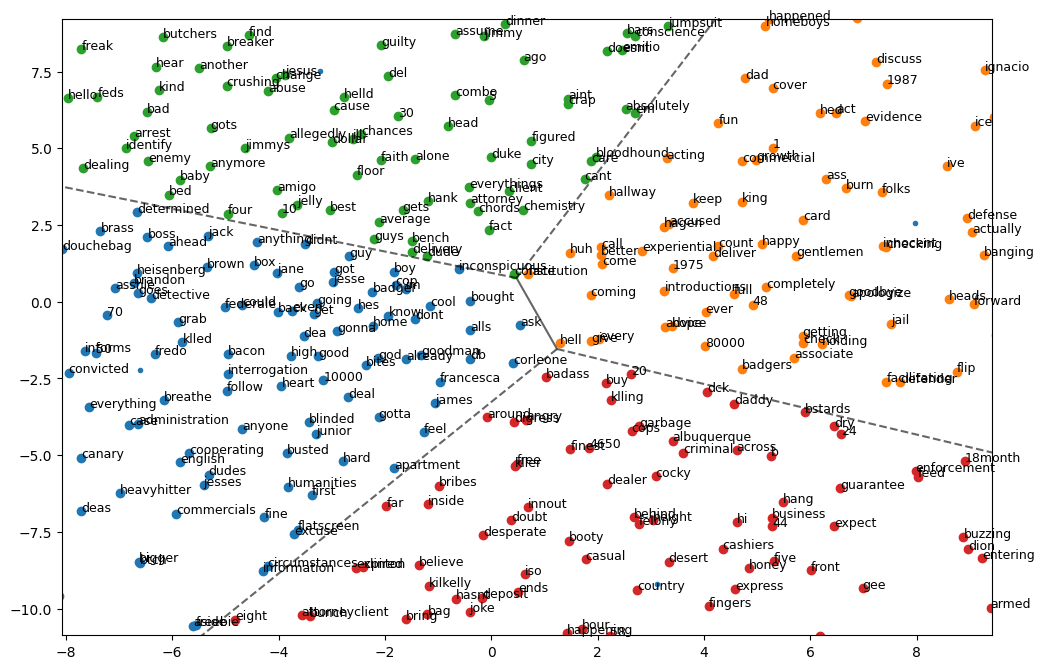

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(all_embeddings)  # Shape: (101, 2)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(embeddings_2d)
cluster_centers = kmeans.cluster_centers_

vor = Voronoi(cluster_centers)
plt.figure(figsize=(12, 8))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='black', line_width=1.5, line_alpha=0.6)

for i in range(n_clusters):
    points = embeddings_2d[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')

vocabulary = list(token_to_id.keys())  # Replace with your actual vocabulary list
for i, word in enumerate(vocabulary):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)

plt.legend()
plt.title("Word Embeddings Clusters with Voronoi Boundaries")
plt.xlabel("D1")
plt.ylabel("D2")
plt.show()

In [ ]:
# start getting some gradio UI going

In [ ]:
!pip install gradio

In [160]:
import gradio as gr

In [161]:
demo = gr.Interface(
    fn=lambda x: f"Selected file: {x}",
    inputs=gr.Dropdown(choices=["breaking_bad_s02e08.txt", "tiny_shakespeare_portion.txt", "seinfeld_the_opposite.txt"], label="Select a text file"),
    outputs="text"
)

In [ ]:
demo.launch()